In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head(40)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(50)

,age,sex,bmi,children,smoker,region,charges
1288,20,male,39.400,2,yes,southwest,38344.56600
1289,44,male,34.320,1,no,southeast,7147.47280
1290,38,female,19.950,2,no,northeast,7133.90250
1291,19,male,34.900,0,yes,southwest,34828.65400
1292,21,male,23.210,0,no,southeast,1515.34490
1293,46,male,25.745,3,no,northwest,9301.89355
1294,58,male,25.175,0,no,northeast,11931.12525
1295,20,male,22.000,1,no,southwest,1964.78000
1296,18,male,26.125,0,no,northeast,1708.92575
1297,28,female,26.510,2,no,southeast,4340.44090


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\ADARSH\AppData\Local\Temp\ipykernel_15060\397658775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=df,palette='Set2')


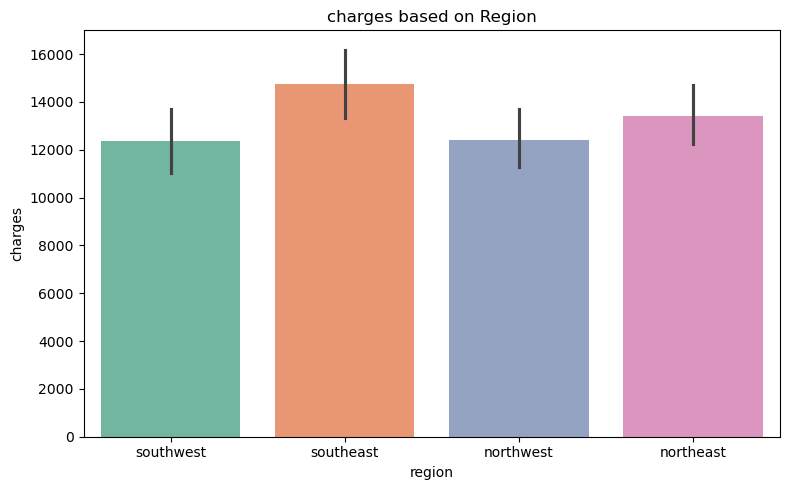

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x='region',y='charges',data=df,palette='Set2')
plt.title("charges based on Region")

plt.tight_layout()
plt.show()

C:\Users\ADARSH\AppData\Local\Temp\ipykernel_15060\2838919483.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


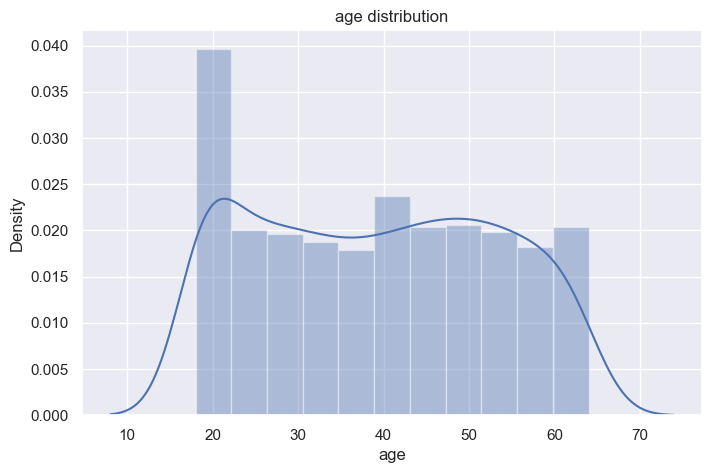

In [9]:
sns.set()
plt.figure(figsize=(8,5))
sns.distplot(df['age'])
plt.title("age distribution")
plt.show()


C:\Users\ADARSH\AppData\Local\Temp\ipykernel_15060\3253052278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


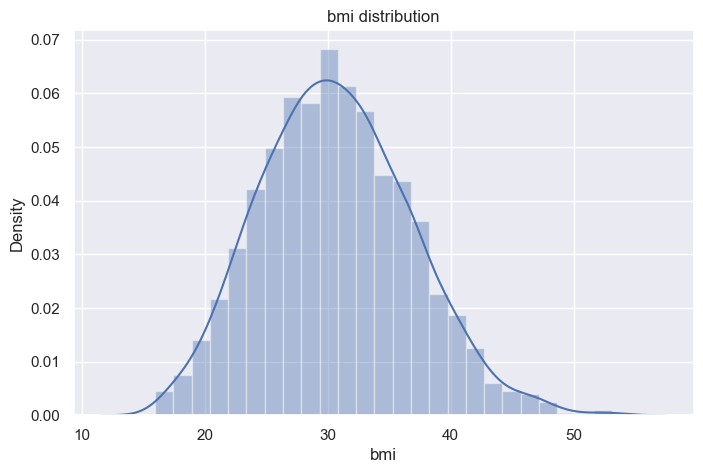

In [10]:
sns.set()
plt.figure(figsize=(8,5))
sns.distplot(df['bmi'])
plt.title("bmi distribution")
plt.show()


Axes(0.125,0.11;0.775x0.77)


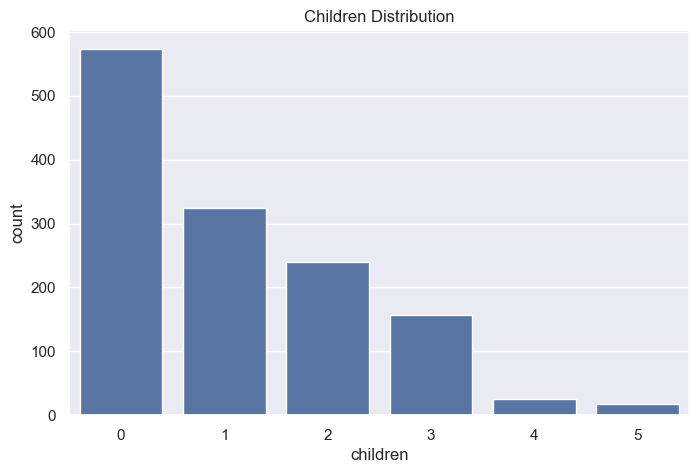

In [11]:

plt.figure(figsize=(8,5))
ax = sns.countplot(x='children', data=df)
plt.title("Children Distribution")

print(ax)


In [12]:
#df.replace({'sex':{'male':0,"female":1}},inplace=True)

In [13]:
df['sex']=LabelEncoder().fit_transform(df['sex'])

In [14]:
print(df)

      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [15]:
df['smoker']=LabelEncoder().fit_transform(df['smoker'])

In [16]:
print(df)

      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [17]:
#df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [18]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\ADARSH\AppData\Local\Temp\ipykernel_15060\439099581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [20]:
correlaion_matrix =df.corr()

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


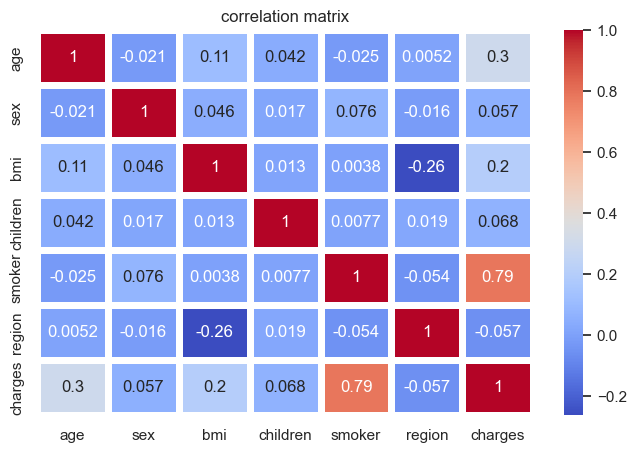

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(correlaion_matrix,annot=True,cmap='coolwarm', linewidths=5)
plt.title("correlation matrix")
plt.show()

In [23]:
x=df.drop(columns='charges',axis=1)


In [24]:
y=df['charges']

In [25]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
#regression=LinearRegression() #Linear Regression

In [29]:
regression=RandomForestRegressor()

In [30]:
regression.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
training_data_prediction=regression.predict(x_train)

In [32]:
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [33]:
r2_train

0.9771438238224028

In [34]:
test_data_prediction=regression.predict(x_test)

In [35]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [36]:
r2_test

0.8357866409387633

In [37]:
import joblib

In [38]:
joblib.dump(regression,'insurence_model.joblib')

['insurence_model.joblib']

In [39]:
print("model saved as 'insurance_model.joblib'")

model saved as 'insurance_model.joblib'
